Before you turn in the homework, make sure everything runs as expected. To do so, select **Kernel**$\rightarrow$**Restart & Run All** in the toolbar above.  Remember to submit both on **DataHub** and **Gradescope**.

Please fill in your name and include a list of your collaborators below.

In [1]:
NAME = "Timlan Wong"
COLLABORATORS = ""

---

# Project 2: NYC Taxi Rides
# Extras

Put all of your extra work in here. Feel free to save figures to use when completing Part 4.

In [2]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sqlalchemy import create_engine
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import sklearn.linear_model as lm
from utils import timeit

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

sns.set(style="whitegrid", palette="muted")
%matplotlib inline

Let's use the SQLite engine from part 1

In [3]:
# DB_URI = "sqlite:////srv/db/taxi_2016_student_small.sqlite"
# TABLE_NAME = "taxi"

# sql_engine = create_engine(DB_URI)
# with timeit():
#     print(f"Table {TABLE_NAME} has {sql_engine.execute(f'SELECT COUNT(*) FROM {TABLE_NAME}').first()[0]} rows!")

Table taxi has 15000000 rows!
0.94 s elapsed


In [4]:
# !ls -lh /srv/db/taxi_2016_student_small.sqlite

-rw-r--r-- 1 root root 2.1G Nov  7 04:43 /srv/db/taxi_2016_student_small.sqlite


Let's run in t he taxi table from part 1

In [5]:
# DB_URI = "sqlite:////srv/db/taxi_2016_student_small.sqlite"
# TABLE_NAME = "taxi"

# sql_engine = create_engine(DB_URI)
# with timeit():
#     print(f"Table {TABLE_NAME} has {sql_engine.execute(f'SELECT COUNT(*) FROM {TABLE_NAME}').first()[0]} rows!")

Table taxi has 15000000 rows!
0.93 s elapsed


Rather than selecting all rides starting in the month of January in the year 2016 like in part 1, let's select all rides starting in the month of February

In [6]:
# feb_query = f"""
# SELECT * 
#             FROM {TABLE_NAME}
#             WHERE tpep_pickup_datetime
#                 BETWEEN '2016-02-01' AND '2016-03-01'
#                 AND record_id % 100 == 0
#             ORDER BY tpep_pickup_datetime
#             """

# # YOUR CODE HERE
# ##raise NotImplementedError()
# with timeit(): # This query should take less than 3 second
#     feb_df = pd.read_sql_query(feb_query, sql_engine)
# feb_df.head()

2.40 s elapsed


,record_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,12580200,1,2016-02-01 00:02:29,2016-02-01 00:20:32,1,3.50,-73.989433,40.762970,1,N,-73.951668,40.781853,1,15.0,0.5,0.5,3.26,0.0,0.3,19.56
1,12581300,1,2016-02-01 00:11:37,2016-02-01 00:21:55,1,3.50,-73.988289,40.720108,1,N,-73.951080,40.687588,1,12.5,0.5,0.5,3.45,0.0,0.3,17.25
2,12581400,2,2016-02-01 00:12:23,2016-02-01 00:24:24,1,2.53,-73.981056,40.721062,1,N,-74.007637,40.741058,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
3,12581500,1,2016-02-01 00:13:11,2016-02-01 00:17:00,1,0.50,-73.974213,40.742897,1,N,-73.980865,40.747684,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
4,12582200,2,2016-02-01 00:19:03,2016-02-01 00:38:33,1,5.50,-73.982292,40.776405,1,N,-73.976456,40.728714,1,18.5,0.5,0.5,1.50,0.0,0.3,21.30


Now, let's store the result of our feb_query into a dataframe called feb_16_df

In [8]:
# with timeit(): # less than 3 seconds
#     feb_16_df = pd.read_sql_query(feb_query, sql_engine)
# feb_16_df['tpep_pickup_datetime'] = pd.to_datetime(feb_16_df['tpep_pickup_datetime'])
# feb_16_df['tpep_dropoff_datetime'] = pd.to_datetime(feb_16_df['tpep_dropoff_datetime'])
# feb_16_df.head()

2.40 s elapsed


,record_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,12580200,1,2016-02-01 00:02:29,2016-02-01 00:20:32,1,3.50,-73.989433,40.762970,1,N,-73.951668,40.781853,1,15.0,0.5,0.5,3.26,0.0,0.3,19.56
1,12581300,1,2016-02-01 00:11:37,2016-02-01 00:21:55,1,3.50,-73.988289,40.720108,1,N,-73.951080,40.687588,1,12.5,0.5,0.5,3.45,0.0,0.3,17.25
2,12581400,2,2016-02-01 00:12:23,2016-02-01 00:24:24,1,2.53,-73.981056,40.721062,1,N,-74.007637,40.741058,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
3,12581500,1,2016-02-01 00:13:11,2016-02-01 00:17:00,1,0.50,-73.974213,40.742897,1,N,-73.980865,40.747684,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
4,12582200,2,2016-02-01 00:19:03,2016-02-01 00:38:33,1,5.50,-73.982292,40.776405,1,N,-73.976456,40.728714,1,18.5,0.5,0.5,1.50,0.0,0.3,21.30


Similarly to part 1, let's clean our data.

In [9]:
cleaned_feb_16_df = feb_16_df.copy()

This query will find all rides in feb16 that are less than 12 hours, or 0.5 days.

In [12]:
# q3a_query = f"""
# SELECT *
# FROM ({feb_query})
# WHERE (julianday(tpep_dropoff_datetime) - julianday(tpep_pickup_datetime)) < 0.5
#             """

# # YOUR CODE HERE
# ##raise NotImplementedError()
# with timeit(): # should take < 3 seconds
#     q3a_df = pd.read_sql_query(q3a_query, sql_engine)
# q3a_df.head()

2.50 s elapsed


,record_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,12580200,1,2016-02-01 00:02:29,2016-02-01 00:20:32,1,3.50,-73.989433,40.762970,1,N,-73.951668,40.781853,1,15.0,0.5,0.5,3.26,0.0,0.3,19.56
1,12581300,1,2016-02-01 00:11:37,2016-02-01 00:21:55,1,3.50,-73.988289,40.720108,1,N,-73.951080,40.687588,1,12.5,0.5,0.5,3.45,0.0,0.3,17.25
2,12581400,2,2016-02-01 00:12:23,2016-02-01 00:24:24,1,2.53,-73.981056,40.721062,1,N,-74.007637,40.741058,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
3,12581500,1,2016-02-01 00:13:11,2016-02-01 00:17:00,1,0.50,-73.974213,40.742897,1,N,-73.980865,40.747684,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
4,12582200,2,2016-02-01 00:19:03,2016-02-01 00:38:33,1,5.50,-73.982292,40.776405,1,N,-73.976456,40.728714,1,18.5,0.5,0.5,1.50,0.0,0.3,21.30


In [13]:
# cleaned_feb_16_df['duration'] = cleaned_feb_16_df["tpep_dropoff_datetime"]-cleaned_feb_16_df["tpep_pickup_datetime"]
# cleaned_feb_16_df['duration'] = cleaned_feb_16_df['duration'].dt.total_seconds()
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['duration'] < 12 * 3600]
# assert len(q3a_df) == len(cleaned_feb_16_df)

In [14]:
# len(q3a_df), len(cleaned_feb_16_df)

(24286, 24286)

Let's find all rides in q3a_query that are within the NYC region. We'll use this query as a temporary table q3b_query.

In [15]:
# def bounding_condition(lat_l, lat_u, lon_l, lon_u):
#     return f"""
#             pickup_longitude <= {lon_u} AND
#             pickup_longitude >= {lon_l} AND
#             dropoff_longitude <= {lon_u} AND
#             dropoff_longitude >= {lon_l} AND
#             pickup_latitude <= {lat_u} AND
#             pickup_latitude >= {lat_l} AND
#             dropoff_latitude <= {lat_u} AND
#             dropoff_latitude >= {lat_l} 
#             """

# q3b_query = f"""
# SELECT *
# FROM ({q3a_query})
# WHERE {bounding_condition(40.63, 40.85, -74.03, -73.75)}
#             """
# lat_l = 40.63
# lat_u = 40.85
# lon_l = -74.03
# lon_u = -73.75

# # YOUR CODE HERE
# ##raise NotImplementedError()
# with timeit(): # should take < 3 seconds
#     q3b_df = pd.read_sql_query(q3b_query, sql_engine)
# q3b_df.head()

2.42 s elapsed


,record_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,12580200,1,2016-02-01 00:02:29,2016-02-01 00:20:32,1,3.50,-73.989433,40.762970,1,N,-73.951668,40.781853,1,15.0,0.5,0.5,3.26,0.0,0.3,19.56
1,12581300,1,2016-02-01 00:11:37,2016-02-01 00:21:55,1,3.50,-73.988289,40.720108,1,N,-73.951080,40.687588,1,12.5,0.5,0.5,3.45,0.0,0.3,17.25
2,12581400,2,2016-02-01 00:12:23,2016-02-01 00:24:24,1,2.53,-73.981056,40.721062,1,N,-74.007637,40.741058,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
3,12581500,1,2016-02-01 00:13:11,2016-02-01 00:17:00,1,0.50,-73.974213,40.742897,1,N,-73.980865,40.747684,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
4,12582200,2,2016-02-01 00:19:03,2016-02-01 00:38:33,1,5.50,-73.982292,40.776405,1,N,-73.976456,40.728714,1,18.5,0.5,0.5,1.50,0.0,0.3,21.30


In [16]:
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['pickup_longitude'] <= -73.75]
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['pickup_longitude'] >= -74.03]
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['pickup_latitude'] <= 40.85]
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['pickup_latitude'] >= 40.63]
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['dropoff_longitude'] <= -73.75]
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['dropoff_longitude'] >= -74.03]
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['dropoff_latitude'] <= 40.85]
# cleaned_feb_16_df = cleaned_feb_16_df[cleaned_feb_16_df['dropoff_latitude'] >= 40.63]
# assert len(q3b_df) == len(cleaned_feb_16_df)

In [17]:
# len(q3b_df), len(cleaned_feb_16_df)

(23575, 23575)

In [19]:
# max(cleaned_feb_16_df['passenger_count'])

6

In [20]:
# min(cleaned_feb_16_df['passenger_count'])

1

In [3]:
# data_file = Path("data/part3", "cleaned_data-Copy1.hdf")
# train_df_part_1 = pd.read_hdf(data_file,"train")

In [4]:
# data_file = Path("./", "cleaned_data.hdf")
# train_df = pd.read_hdf(data_file, "train") ##part 1 shape is (18354, 21). head is record 8614300
# val_df = pd.read_hdf(data_file, "val")

In [18]:
##Test data
# test_df = pd.read_csv("./proj2_test_data.csv")
# test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
# test_df.head()

In [7]:
##Long and short rides
# short_rides = train_df[train_df["duration"] <= 900]
# long_rides = train_df[train_df["duration"] > 900] 

In [8]:
# # Copied from part 2
# def haversine(lat1, lng1, lat2, lng2):
#     """
#     Compute haversine distance
#     """
#     lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
#     average_earth_radius = 6371
#     lat = lat2 - lat1
#     lng = lng2 - lng1
#     d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
#     h = 2 * average_earth_radius * np.arcsin(np.sqrt(d))
#     return h

# # Copied from part 2
# def manhattan_distance(lat1, lng1, lat2, lng2):
#     """
#     Compute Manhattan distance
#     """
#     a = haversine(lat1, lng1, lat1, lng2)
#     b = haversine(lat1, lng1, lat2, lng1)
#     return a + b

# # Copied from part 2
# def bearing(lat1, lng1, lat2, lng2):
#     """
#     Compute the bearing, or angle, from (lat1, lng1) to (lat2, lng2).
#     A bearing of 0 refers to a NORTH orientation.
#     """
#     lng_delta_rad = np.radians(lng2 - lng1)
#     lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
#     y = np.sin(lng_delta_rad) * np.cos(lat2)
#     x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
#     return np.degrees(np.arctan2(y, x))

# # Copied from part 2
# def add_time_columns(df):
#     """
#     Add temporal features to df
#     """
#     df.is_copy = False # propogate write to original dataframe
#     df.loc[:, 'month'] = df['tpep_pickup_datetime'].dt.month
#     df.loc[:, 'week_of_year'] = df['tpep_pickup_datetime'].dt.weekofyear
#     df.loc[:, 'day_of_month'] = df['tpep_pickup_datetime'].dt.day
#     df.loc[:, 'day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
#     df.loc[:, 'hour'] = df['tpep_pickup_datetime'].dt.hour
#     df.loc[:, 'week_hour'] = df['tpep_pickup_datetime'].dt.weekday * 24 + df['hour']
#     return df

# # Copied from part 2
# def add_distance_columns(df):
#     """
#     Add distance features to df
#     """
#     df.is_copy = False # propogate write to original dataframe
#     df.loc[:, 'manhattan'] = manhattan_distance(lat1=df['pickup_latitude'],
#                                                 lng1=df['pickup_longitude'],
#                                                 lat2=df['dropoff_latitude'],
#                                                 lng2=df['dropoff_longitude'])

#     df.loc[:, 'bearing'] = bearing(lat1=df['pickup_latitude'],
#                                    lng1=df['pickup_longitude'],
#                                    lat2=df['dropoff_latitude'],
#                                    lng2=df['dropoff_longitude'])
#     df.loc[:, 'haversine'] = haversine(lat1=df['pickup_latitude'],
#                                    lng1=df['pickup_longitude'],
#                                    lat2=df['dropoff_latitude'],
#                                    lng2=df['dropoff_longitude'])
#     return df

# def select_columns(data, *columns):
#     return data.loc[:, columns]

In [9]:
##Add time columns to train_df, Long_rides, short_rides:
# train_df = add_time_columns(train_df)
# short_rides = add_time_columns(short_rides)
# long_rides = add_time_columns(long_rides)

/srv/conda/envs/data100/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/srv/conda/envs/data100/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


## New Pipe

In [10]:
# def process_data_gm1(data, test=False):
#     X = (
#         data
        
#         # Transform data
#         .pipe(add_time_columns)
#         .pipe(add_distance_columns)
        
#         .pipe(select_columns,        
#               'hour',  
#               'passenger_count',   
#               'day_of_week', 
#               'dropoff_latitude',
#               'manhattan'
#              )
#     )
#     if test:
#         y = None
#     else:
#         y = data['duration']
        
#     return X, y

In [11]:
# # Train
# X_train, y_train = process_data_gm1(train_df)
# X_val, y_val = process_data_gm1(val_df)
# guided_model_1 = lm.LinearRegression(fit_intercept=True)
# guided_model_1.fit(X_train, y_train)

# # Predict
# y_train_pred = guided_model_1.predict(X_train)
# y_val_pred = guided_model_1.predict(X_val)

/srv/conda/envs/data100/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/srv/conda/envs/data100/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [12]:
# assert 600 <= np.median(y_train_pred) <= 700
# assert 600 <= np.median(y_val_pred) <= 700

In [16]:
# y_train_pred[0]

513.12015859228995

In [17]:
# X_train.iloc[0, :].dot(guided_model_1.coef_) + guided_model_1.intercept_

513.12015859228995

## MAE

In [18]:
# def mae(actual, predicted):
#     """
#     Calculates MAE from actual and predicted values
#     Input:
#       actual (1D array-like): vector of actual values
#       predicted (1D array-like): vector of predicted/fitted values
#     Output:
#       a float, the MAE
#     """
    
#     mae = np.mean(np.abs(actual - predicted))
#     return mae

In [19]:
# print("Validation Error: ", mae(y_val_pred, y_val))

Validation Error:  267.299878056


## Visualizing Error

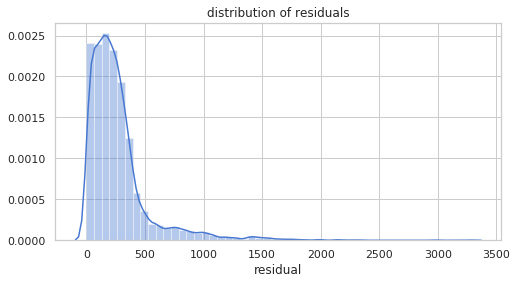

In [20]:
# plt.figure(figsize=(8,4))
# sns.distplot(np.abs(y_val - y_val_pred))
# plt.xlabel('residual')
# plt.title('distribution of residuals');

## Submission

You're almost done!

Before submitting this assignment, ensure that you have:

1. Restarted the Kernel (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Validated the notebook by clicking the "Validate" button.

Then,

1. **Submit** the assignment via the Assignments tab in **Datahub** 
1. **Upload and tag** the manually reviewed portions of the assignment on **Gradescope**